# Algorithm Complexity Analysis:

Linear Character Swap - Breadth First vs. Depth First for secret key guessing

## Problem Description

You found a box containing THE book "How to earn HDs for every course at RMIT with only 5-minute self-learning per day". It's very very very precious, isn't it? However, to open the box you need to know a secret key that is used to unlock the box. By looking at the lock pattern, you know that the secret key contains 16 letters, each can be either "R", "M", "I" or "T". You can calculate how many combinations there are. If each try takes you one second, do you want to try?

Fortunately, you have a hack that: given a guessed secret key, it returns the number of positions that are matched between the guessed key and the correct key. For example (I used only 4 letters here for demonstration purposes only), if the correct secret key is "RMIT" and you guess "MMIT", the last three positions are correct, so 3 is returned. If you guess "TRMI", zero is returned. If you guess "RRRR", 1 is returned. And if you guess "RMIT", 4 is returned. Of course, in your case, you want to have 16 returned.

The correct secret key contains exactly 16 letters, each of which must be either "R", "M", "I", or "T".

You must minimize the number of guess made to reach the correct secret key.

In [1]:
# Imports and environmental setups

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

## Guesses Count Performance

This is the test results for guesses count performance for each of the algorithm.

Test code (abbreviated):

```java
    final int MAX_ITER = 1_000_000;
    final int KEY_LEN = 16;

    for (int i = 0; i < MAX_ITER; i++) {
        SecretKey sk = new SecretKey(KEY_LEN, i);  // Reproducible results for consistent performance measurement.
        SecretKeyGuesser.start(sk, KEY_LEN, SecretKeyGuesser.Algorithm.(...), false);
    }
```

In [2]:
guessData = {
    "Auto": pd.read_csv("../../testData/mikeAlgo1/randomKey16TestAuto.csv"),
    "DepthFirst": pd.read_csv("../../testData/mikeAlgo1/randomKey16TestDepthFirst.csv"),
    "BreadthFirst": pd.read_csv("../../testData/mikeAlgo1/randomKey16TestBreadthFirst.csv")
}

def plot_performance(x_col: str, title: str, save_path: str = None) -> None:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

    sns.lineplot(
        x=guessData["Auto"][x_col], y=guessData["Auto"]["GuessCount"], ax=ax,
        c="red", alpha=0.3,
        label=f"Auto (max={guessData['Auto']['GuessCount'].max()}, "
              f"min={guessData['Auto']['GuessCount'].min()}, "
              f"mean={guessData['Auto']['GuessCount'].mean()})",
        linestyle="--"
    )

    sns.lineplot(
        x=guessData["DepthFirst"][x_col], y=guessData["DepthFirst"]["GuessCount"], ax=ax,
        c="green", alpha=0.3,
        label=f"DepthFirst (max={guessData['DepthFirst']['GuessCount'].max()}, "
              f"min={guessData['DepthFirst']['GuessCount'].min()}, "
              f"mean={guessData['DepthFirst']['GuessCount'].mean()})"
    )

    sns.lineplot(
        x=guessData["BreadthFirst"][x_col], y=guessData["BreadthFirst"]["GuessCount"], ax=ax,
        c="blue", alpha=0.3,
        label=f"BreadthFirst (max={guessData['BreadthFirst']['GuessCount'].max()}, "
              f"min={guessData['BreadthFirst']['GuessCount'].min()}, "
              f"mean={guessData['BreadthFirst']['GuessCount'].mean()})"
    )

    ax.legend()
    fig.suptitle(title, fontsize=18, fontweight="bold")
    fig.tight_layout()

    plt.show()
    if save_path is not None:
        fig.savefig(save_path)

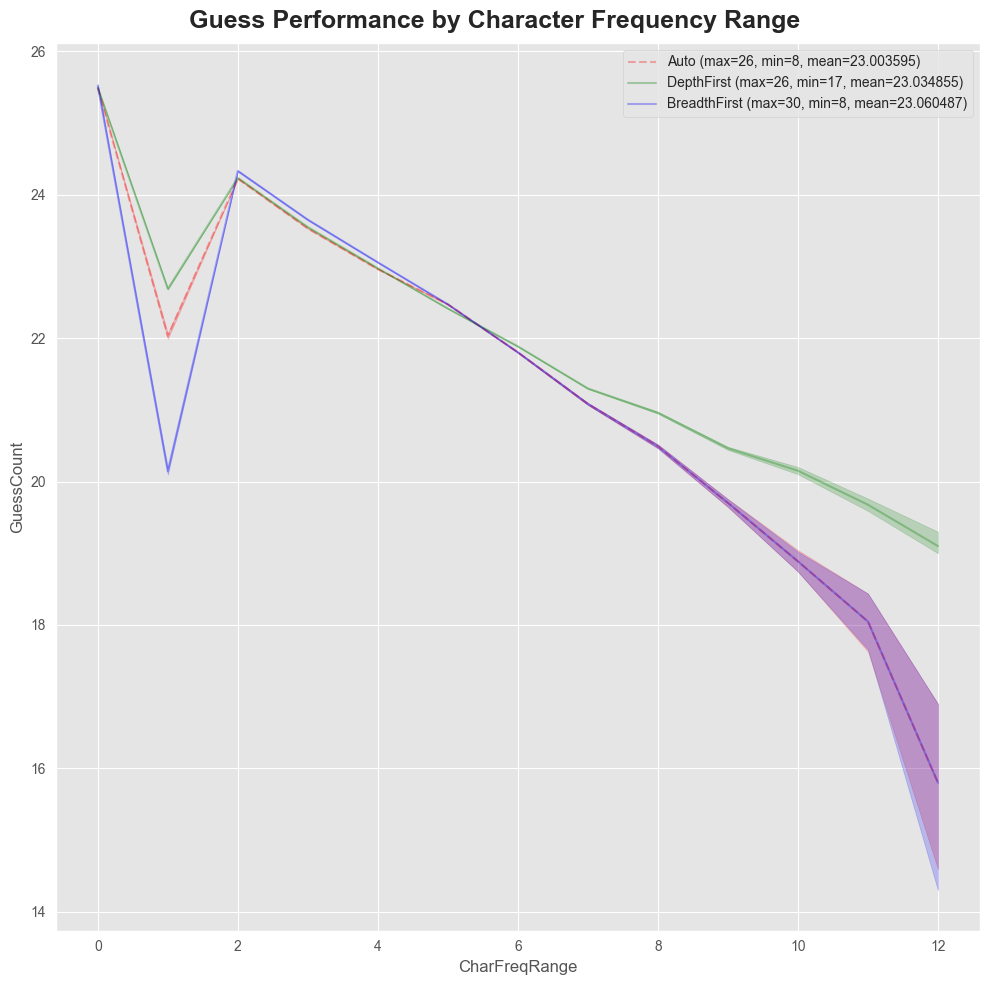

In [3]:
plot_performance("CharFreqRange", "Guess Performance by Character Frequency Range", "images/GuessCountByRange.png")

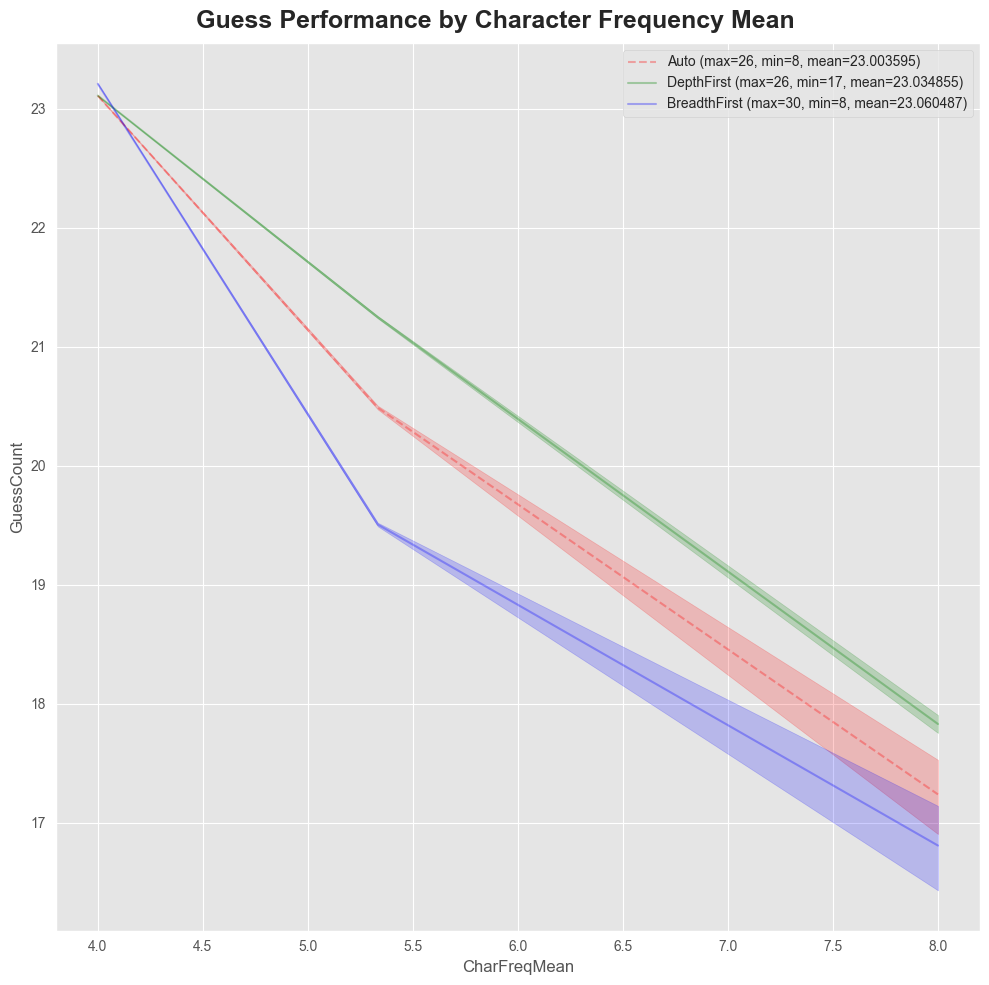

In [4]:
plot_performance("CharFreqMean", "Guess Performance by Character Frequency Mean", "images/GuessCountByMean.png")

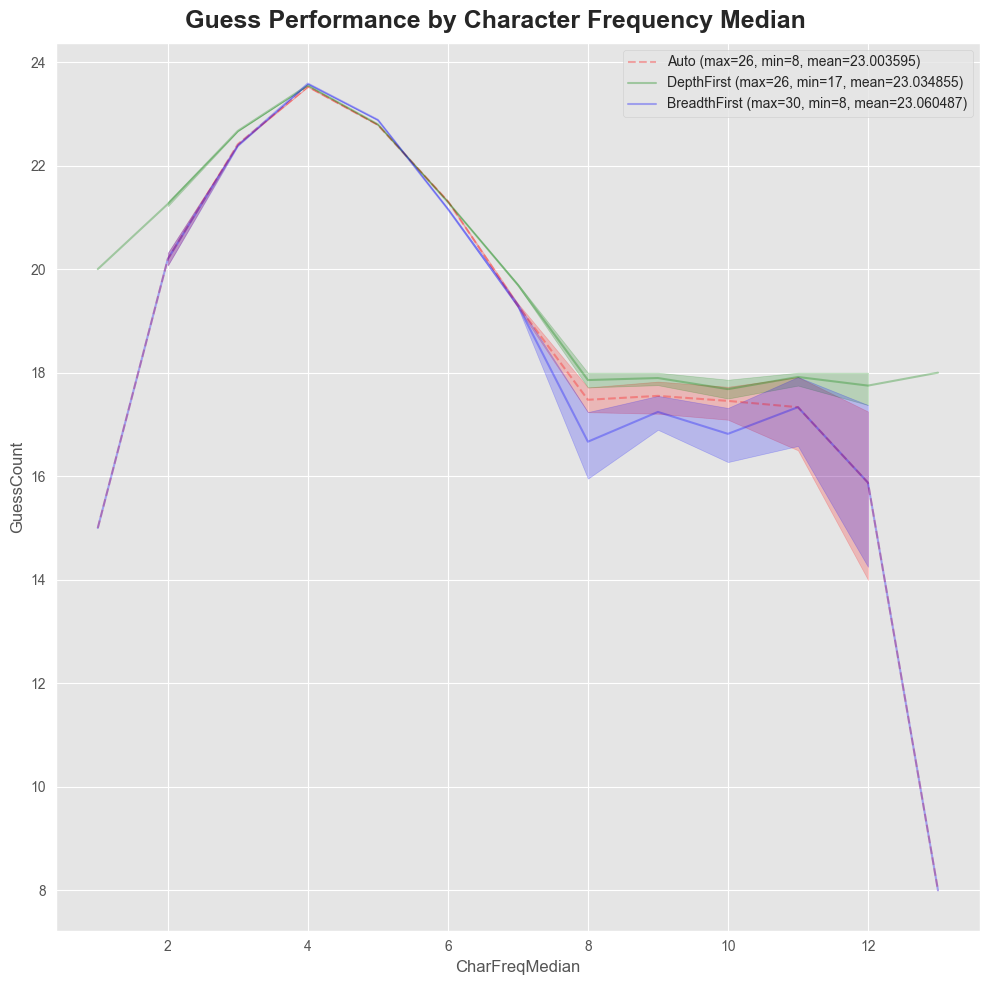

In [5]:
plot_performance("CharFreqMedian", "Guess Performance by Character Frequency Median", "images/GuessCountByMedian.png")

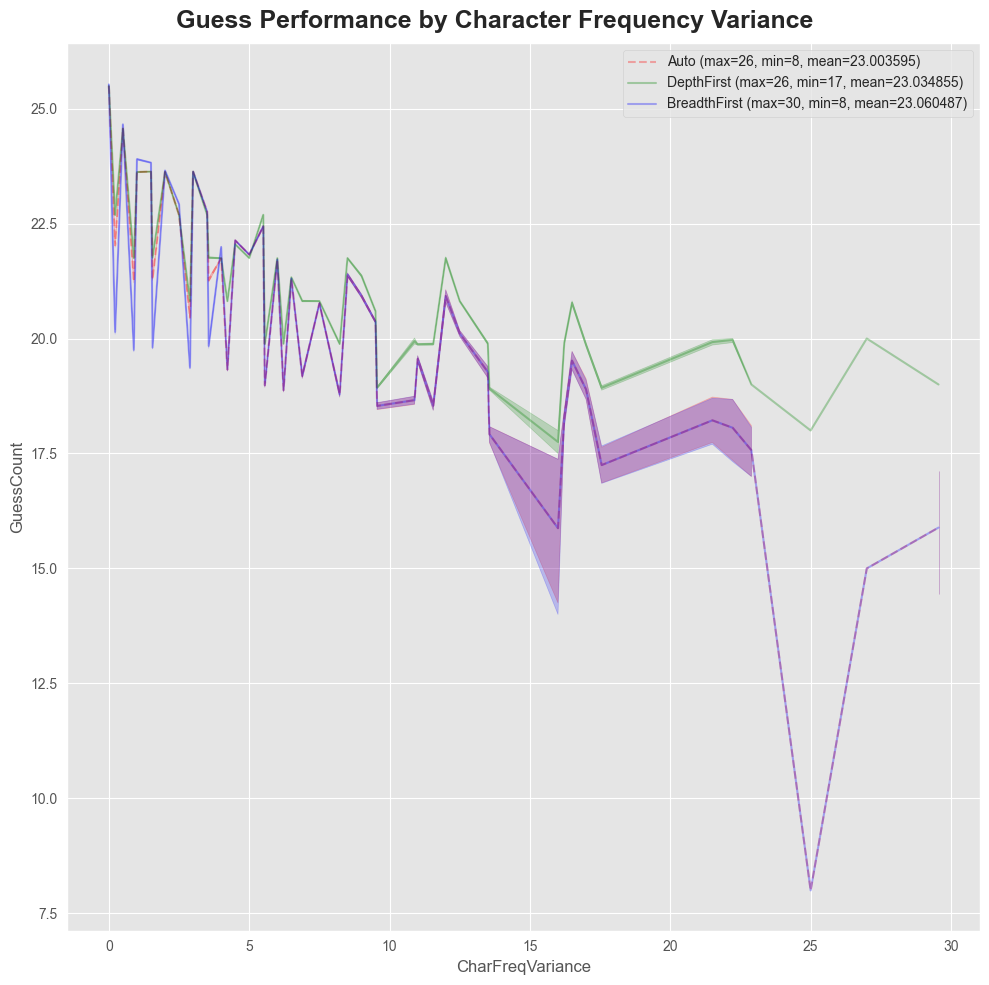

In [6]:
plot_performance("CharFreqVariance", "Guess Performance by Character Frequency Variance", "images/GuessCountByVariance.png")

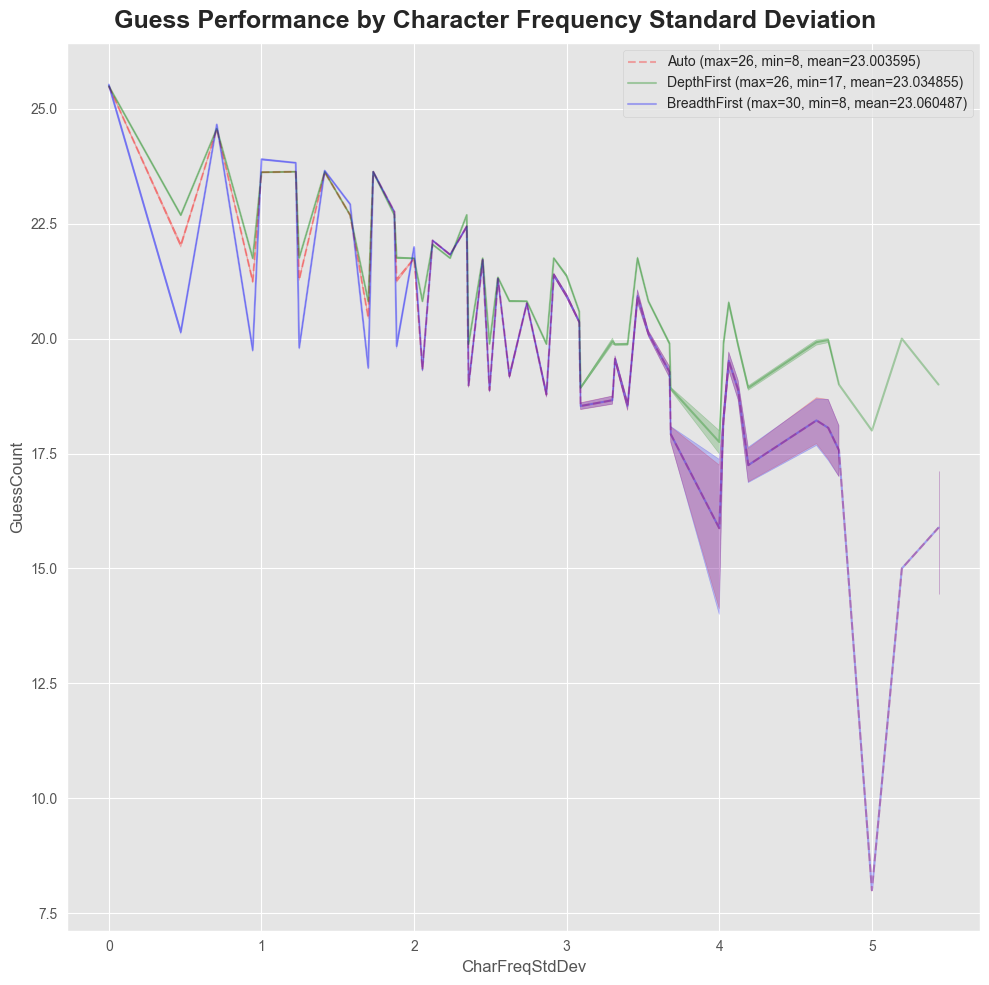

In [7]:
plot_performance("CharFreqStdDev", "Guess Performance by Character Frequency Standard Deviation", "images/GuessCountByStdDev.png")

## Time Complexity

This is the time complexity test results for each algorithm. Since we can see that both of them are O(n<sup>2</sup>) based on [their code](../../src/main/java/vn/rmit/cosc2658/development/mike_algo1/SecretKeyGuesser.java), the overall time complexity should also be O(n<sup>2</sup>).

Test code (abbreviated):

```java
    final int MAX_KEY_LENGTH = 512;

    for (int keyLength = 1; keyLength <= MAX_KEY_LENGTH; keyLength++) {
        SecretKey sk = new SecretKey(keyLength, 0);  // Seed = 0 to ensure reproducible results
        SecretKeyGuesser.start(sk, keyLength, SecretKeyGuesser.Algorithm.(...), false);
    }
```

In [8]:
timeData = {
    "Auto": pd.read_csv("../../testData/mikeAlgo1/randomKeyVariableLengthTestAuto.csv"),
    "DepthFirst": pd.read_csv("../../testData/mikeAlgo1/randomKeyVariableLengthTestDepthFirst.csv"),
    "BreadthFirst": pd.read_csv("../../testData/mikeAlgo1/randomKeyVariableLengthTestBreadthFirst.csv")
}

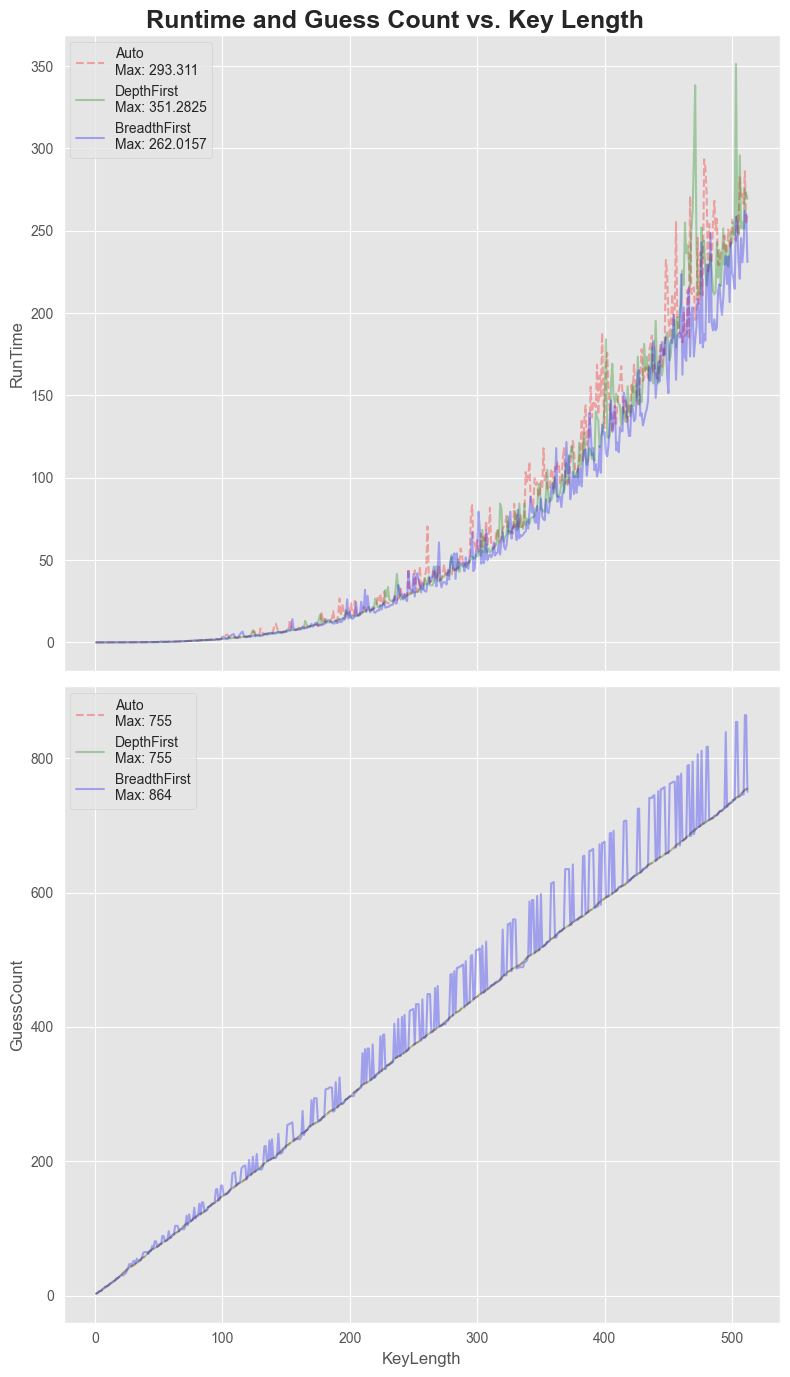

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex="all", figsize=(8, 14))

sns.lineplot(
    x=timeData["Auto"]["KeyLength"], y=timeData["Auto"]["RunTime"], ax=ax[0],
    c="red", alpha=0.3,
    label=f"Auto\nMax: {timeData['Auto']['RunTime'].max()}", linestyle="--"
)
sns.lineplot(
    x=timeData["Auto"]["KeyLength"], y=timeData["Auto"]["GuessCount"], ax=ax[1],
    c="red", alpha=0.3,
    label=f"Auto\nMax: {timeData['Auto']['GuessCount'].max()}", linestyle="--"
)

sns.lineplot(
    x=timeData["DepthFirst"]["KeyLength"],y=timeData["DepthFirst"]["RunTime"], ax=ax[0],
    c="green", alpha=0.3,
    label=f"DepthFirst\nMax: {timeData['DepthFirst']['RunTime'].max()}"
)
sns.lineplot(
    x=timeData["DepthFirst"]["KeyLength"], y=timeData["DepthFirst"]["GuessCount"], ax=ax[1],
    c="green", alpha=0.3,
    label=f"DepthFirst\nMax: {timeData['DepthFirst']['GuessCount'].max()}"
)

sns.lineplot(
    x=timeData["BreadthFirst"]["KeyLength"], y=timeData["BreadthFirst"]["RunTime"], ax=ax[0],
    c="blue", alpha=0.3,
    label=f"BreadthFirst\nMax: {timeData['BreadthFirst']['RunTime'].max()}"
)
sns.lineplot(
    x=timeData["BreadthFirst"]["KeyLength"], y=timeData["BreadthFirst"]["GuessCount"], ax=ax[1],
    c="blue", alpha=0.3,
    label=f"BreadthFirst\nMax: {timeData['BreadthFirst']['GuessCount'].max()}"
)

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")

fig.suptitle("Runtime and Guess Count vs. Key Length", fontsize=18, fontweight="bold")
fig.tight_layout()

plt.show()
fig.savefig("images/TimeComplexity.png")